In [31]:
# Import Qiskit library
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
# Adding the transpiler to reduce the circuit to QASM instructions
# supported by the backend
from qiskit import transpile
# Use Aer's qasm_simulator
from qiskit.providers.aer import QasmSimulator
from math import pi

In [32]:
qr = QuantumRegister(3, 'q13')
cr = ClassicalRegister(3, 'c')
qc = QuantumCircuit(qr, cr)

# Gates
qc.h(0)
qc.y(1)
qc.h(2)
qc.cx(0,1)
qc.ccx(0,1,2)
qc.z(1)
qc.rz(pi/5, 2)

#Measure
qc.measure(range(3),range(3))

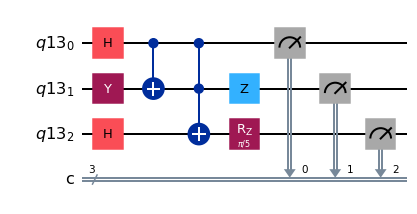

In [33]:
qc.draw('mpl', style='iqx')

## Result of the original implementation of the orginal circuit

In [34]:
backend = QasmSimulator()
# First we have to transpile the quantum circuit
# to the low-level QASM instructions used by the
# backend
qc_compiled = transpile(qc, backend)

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend.run(qc_compiled, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

In [35]:
print(result_sim.get_counts(qc_compiled))

{'001': 243, '010': 245, '101': 285, '110': 251}


In [36]:
#`In order to make the decomposition I use Phase gate of Qiskit (the past U1 gate)
# 𝑈1(𝜆=𝜋)=𝑍
# 𝑈1(𝜆=𝜋/2)=𝑆
# 𝑈1(𝜆=𝜋/4)=𝑇
# U1(𝜆)= 𝑒𝑖𝜆/2𝑅𝑍(𝜆)
#
# Equivalent of the new Phase gate representation :
# 𝑃(𝜆=𝜋)=𝑍
# 𝑃(𝜆=𝜋/2)=𝑆
# 𝑃(𝜆=𝜋/4)=𝑇
#

qr = QuantumRegister(3, 'q13')
cr = ClassicalRegister(3, 'c')
qc = QuantumCircuit(qr, cr)

# Gates
qc.h(0)
qc.y(1)
qc.h(2)
qc.cx(0,1)
qc.ccx(0,1,2)
qc.z(1)
qc.rz(pi/5, 2)

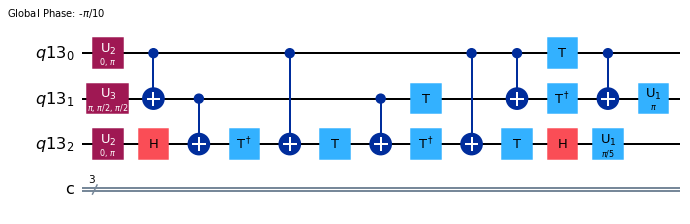

In [37]:
qc_basic = qc.decompose()
qc_basic.draw('mpl', style='iqx')

## Result of the decomposition of the circuit into clifford + T gates

In [38]:
#Measure
qc_basic.measure(range(3),range(3))

## Optimization phase

In [39]:
backend = QasmSimulator()
# First we have to transpile the quantum circuit
# to the low-level QASM instructions used by the
# backend
qc_compiled = transpile(qc_basic, backend)

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend.run(qc_compiled, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

In [40]:
print(result_sim.get_counts(qc_compiled))

{'010': 248, '110': 242, '101': 278, '001': 256}
